libraries imported


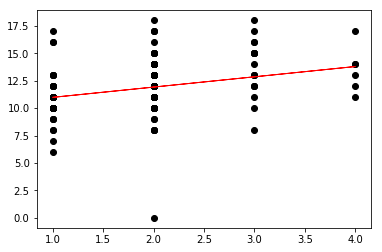

In [6]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style

print("libraries imported")

#read data
df = pd.read_csv(r"C:\Users\noah8_000\Documents\GitHub\Learning-Analytics-Projet\190124_Igrade_application\igrade\static\datasets\dataset_main.csv", engine='python')

df.head()
df.shape

# add new feature to use it for classification
grades = df['G3'].values
labels = []

X = df['studytime'].values[:,np.newaxis]
y = df['G3'].values

X1 = df['age'].values[:,np.newaxis]
y1 = df['G3'].values

#df.age.hist()
#plt.xlabel('age')
#plt.ylabel('Count')
#plt.title('age of Final Grades')

for grade in grades:
    if grade >=17:
        labels.append('very good')
    elif grade < 17 and grade >= 15:
        labels.append('good')
    elif grade < 15 and grade >= 10:
        labels.append('average')
    elif grade < 10:
        labels.append('bad')

#preparing test data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.20)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=0,test_size=0.20)
lis = LinearRegression()
lis.fit(X_train,y_train)
y_pred = lis.predict(X_test) 


plt.scatter(X_test,y_test, color='black')
plt.plot(X_test,y_pred, color='red', linewidth=1)

#print(lis.intercept_)
#print(lis.coef_)  

#report func



#model

C:\Users\noah8_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\noah8_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


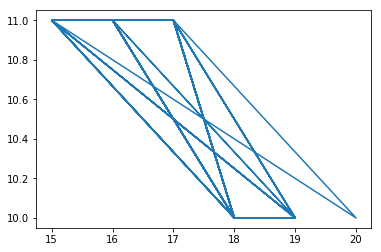

In [7]:
lr = LogisticRegression()
lr.fit(X1_train,y1_train)
y1_pred = lr.predict(X1_test) 
#ls.score(X_test, y_test)

plt.plot(X1_test,y1_pred)


In [10]:
def report(clf, X_train_std, y_train, X_test_std, y_test, M_name):
    print("+++++report of the model+++++")
    print(M_name)
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    print('Precision score: {:3f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Prediction Accuracy: {:3f}'.format(accuracy_score(y_test, y_pred)))
    print('Recall score: {:3f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('F1 score: {:3f}'.format(f1_score(y_test, y_pred, average='macro')))


In [9]:
#encoding the data
enc = LabelEncoder()
for item in df:
    data_raw = df[item].values
    df[item] = enc.fit_transform(data_raw)

enc_labels = enc.fit_transform(labels)
